In [1]:
# Importando os Módulos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn import model_selection
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from warnings import simplefilter
simplefilter(action='ignore')
%matplotlib inline

In [2]:
# Lendo os conjuntos teste e treino
train = pd.read_csv('Database/train.csv')
test = pd.read_csv('Database/test.csv')
data = [train,test]

In [3]:
# Visualizando as 5 primeiras linhas do conjunto de treino.
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Visualizando as 5 primeiras linhas do conjunto de teste.
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Variáveis numéricas.
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Variáveis categóricas.
train.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ling, Mr. Lee",male,347082,C23 C25 C27,S
freq,1,577,7,4,644


In [7]:
# Tipos dos dados.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Análise Exploratória

In [8]:
# Qual a quantidade de sobreviventes do Titanic?
survived = train[train['Survived'] == 1]
not_survived = train[train['Survived'] == 0]

print(f'Total de Passageiros: {len(train)}')
print(f'Sobreviveram: {len(survived)}')
print(f'Não Sobreviveram: {len(not_survived)}')

Total de Passageiros: 891
Sobreviveram: 342
Não Sobreviveram: 549


In [9]:
# Os passageiros do Titanic estavam divididos em 3 classes:
# os que viajavam na 1ª classe na sua maioria eram os mais ricos, 
# na 2ª classe eram viajantes de classe média,
# os da 3ª classe eram principalmente imigrantes. 

In [10]:
# Total de passageiros por classe.
train.groupby('Pclass').size()

Pclass
1    216
2    184
3    491
dtype: int64

In [11]:
# Número de passageiros de cada classe e seus respectivos sexos.
pd.crosstab(train['Pclass'],train['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [12]:
# Número de sobreviventes por classe.
# 0 - not survived    1 - survived
pd.crosstab(train['Pclass'],train['Survived'])

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [13]:
# Média de sobreviventes por classe.
train[['Pclass','Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


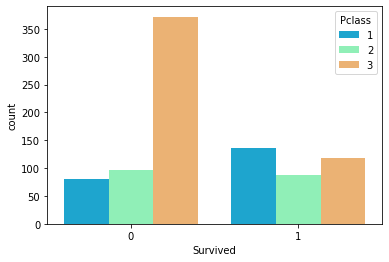

In [14]:
sns.countplot(x='Survived', hue='Pclass', data=train, palette='rainbow')

In [15]:
# Quantidade de passageiros de acordo com o sexo.
# female = feminino, male = masculino
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
# Número de sobreviventes por sexo.
# 0 - not survived    1 - survived
pd.crosstab(train['Sex'],train['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [17]:
# Média de sobreviventes de cada sexo.
train[['Sex','Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Podemos observar que o número de sobreviventes do sexo feminino foi maior, pois no caso do Titanic, o capitão ordenou que as mulheres e as crianças fossem colocados a salvo primeiro.

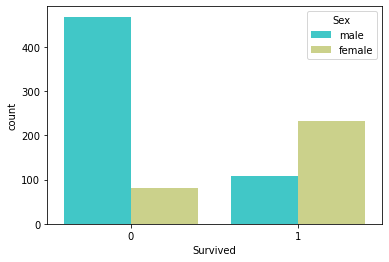

In [18]:
sns.countplot(x='Survived' ,hue='Sex', data=train, palette='rainbow')

In [19]:
# Número de passageiros de acordo com a país de embarque.
# S-> Southampton (Reino Unido)
# C-> Cherbourg-Octeville (França)
# Q-> Queenstown (Irlanda)
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

O Titanic deixou o porto de Southampton às 12h15min do dia 10 de abril de 1912,isso explica o maior número de passageiros provenientes desse país.

In [20]:
# Número de sobreviventes por país de embarque.
# 0 - not survived    1 - survived
pd.crosstab(train['Embarked'],train['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [21]:
# Média de sobreviventes de acordo com o país que ele embarcou.
train[['Embarked','Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by='Survived',ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


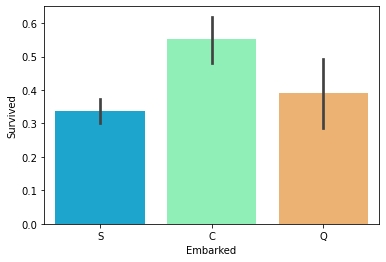

In [22]:
sns.barplot(x='Embarked', y='Survived', data=train, palette='rainbow')

In [23]:
# Número de pais e filhos viajando com o passageiro.
train['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [24]:
# Número de sobreviventes de acordo com a quantidade de pais e filhos viajando com o passageiro.
# 0 - not survived    1 - survived
pd.crosstab(train['Parch'],train['Survived'])

Survived,0,1
Parch,,
0,445,233
1,53,65
2,40,40
3,2,3
4,4,0
5,4,1
6,1,0


In [25]:
# Média de sobrevivência com base no número de pais/ filhos que o passageiro tinha no navio.
train[['Parch','Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


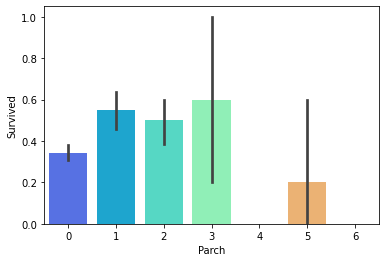

In [26]:
sns.barplot(x='Parch', y='Survived', data=train, palette='rainbow')

In [27]:
# Número de irmãos e cônjuges viajando com o passageiro.
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [28]:
# Número de sobreviventes de acordo com a quantidade de irmãos e cônjuges viajando com o passageiro.
# 0 - not survived    1 - survived
pd.crosstab(train['SibSp'],train['Survived'])

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


In [29]:
# Média de sobrevivência com base no número de irmãos e cônjuges que o passageiro tinha no navio.
train[['SibSp','Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


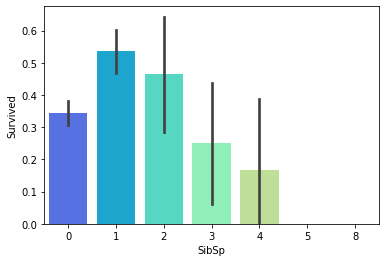

In [30]:
sns.barplot(x='SibSp', y='Survived', data=train, palette='rainbow')

Text(0.5, 1.0, 'Distribuição da idade')

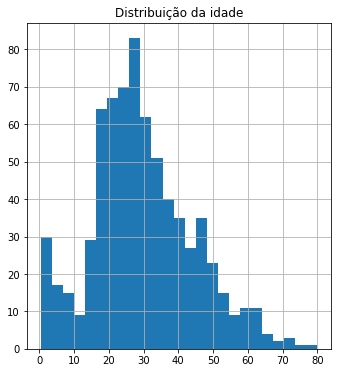

In [31]:
# Distribuição das idades.
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
fig = train.Age.hist(bins=25)
fig.set_title('Distribuição da idade')

Text(0.5, 1.0, 'Distribuição do valor da passagem')

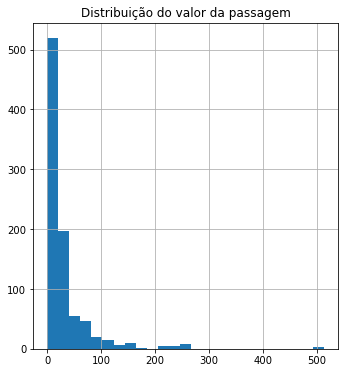

In [32]:
# Distribuição dos valores da passagem.
plt.figure(figsize=(12,6))
plt.subplot(1,2,2)
fig = train.Fare.hist(bins=25)
fig.set_title('Distribuição do valor da passagem')

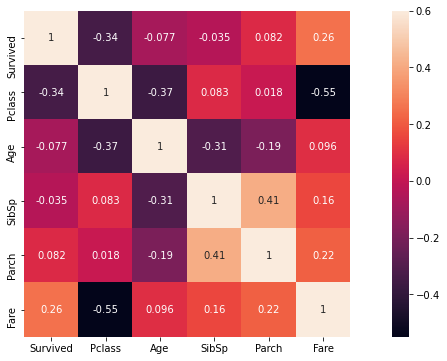

In [33]:
# Matriz de correlação.
# Possibilita a análise simultânea da associação entre variáveis.
plt.figure(figsize=(15,6))
sns.heatmap(train.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

In [34]:
# Verificando a quantidade de valores nulos no dataset de treino.
train.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [35]:
# Verificando a quantidade de valores nulos no dataset de teste.
test.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [36]:
# Preenchendo os valores nulos da coluna 'Age'.
for dataset in data:
    dataset['Age'].fillna(dataset['Age'].mean(), inplace=True)

In [37]:
# Preenchendo os valores nulos da coluna 'Fare'.
for dataset in data:
    dataset['Fare'].fillna(dataset['Fare'].mean(), inplace=True)

In [38]:
# A coluna possui um número bem pequeno de valores faltantes,
# então podemos preencher-la com o valor mais frequente, 
# Variável que mais se repete na coluna 'Embarked'
train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [39]:
# Preenchendo os valores nulos da coluna 'Embarked'.
top = 'S'
for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(top)

train.isnull().sum().sort_values(ascending=False)

Cabin          687
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [40]:
# Convertendo a coluna 'Embarked' para númerico.
ports = {"S": 0, "C": 1, "Q": 2}

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [41]:
# Convertendo a coluna 'Sex' para númerico.
genders = {"male": 0, "female": 1}

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [42]:
# Podemos observar que os nomes estão acompanhados de títulos, vamos extrair esses títulos para saber se eles tem alguma correlação entre as variáveis.
for dataset in data:
    dataset['Title'] = dataset['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,Mr


In [43]:
# Iremos agrupar esses títulos nas seguintes categorias:

# Miss -> Mulheres jovens.
# Mr -> Homens casados.
# Mrs -> Mulheres casadas.
# Master -> Homens jovens.
# Rare -> Capitão,médicos,reverendos e pessoas da alta realeza.

# Definindo valores para cada título.
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Lady','the Countess','Don','Sir','Jonkheer','Capt','Col','Dr','Major','Rev','Dona'],'Rare')
    dataset['Title'] = dataset['Title'].map(titles)
    dataset['Title'] = dataset ['Title']. fillna (0) 

# Taxa de sobrevivência com base nos títulos.
train[['Title','Survived']].groupby(['Title'],as_index=False).mean()
train.drop(['Name','Ticket','Cabin'],axis=1, inplace=True)

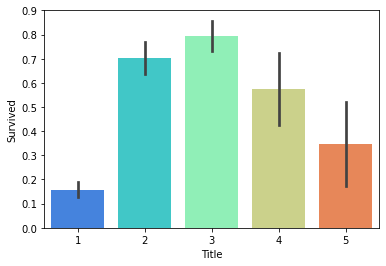

In [44]:
sns.barplot(x='Title', y='Survived', data=train, palette='rainbow')

In [45]:
# Vamos unir a coluna 'SibSp' e 'Parch' para criar uma nova coluna 'Family'.
# Tudo indica que essas duas colunas juntas nos dão o número de membros de uma mesma família.
for dataset in data:
    dataset['Family'] = dataset['SibSp'] + dataset['Parch'] + 1
    
# Média de sobrevivência com base no número de membros da família no navio. 
train[['Family','Survived']].groupby(['Family'], as_index = False).mean().sort_values(by='Survived',ascending=False)

,Family,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


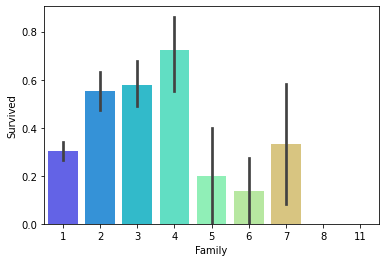

In [46]:
sns.barplot(x='Family', y='Survived', data=train, palette='rainbow')

In [47]:
# Vamos verificar se quem viajava sozinho tinha mais chance de sobreviver.
for dataset in data:
    dataset['Alone'] = dataset['Family'].apply(lambda x: x if x == 1 else 0)

# Média de sobrevivência com base no número de membros da família no navio.
train[['Alone','Survived']].groupby(['Alone'], as_index = False).mean().sort_values(by='Survived',ascending=False)

,Alone,Survived
0,0,0.505650
1,1,0.303538


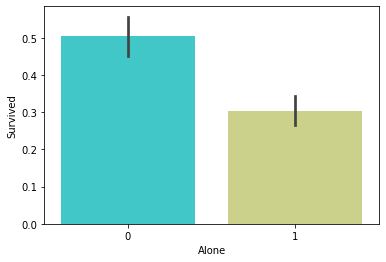

In [48]:
sns.barplot(x='Alone', y='Survived', data=train, palette='rainbow')

# Tratando os Outliers

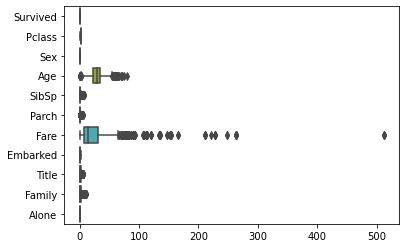

In [49]:
# Verificando os Outliers
# Os valores fora da barreira externa são caracterizados como Outliers.
sns.boxplot(data = train.drop('PassengerId',axis=1), orient= 'h')

In [50]:
# Quartil inferior e superior coluna 'Fare'
Q1 = train['Fare'].quantile(q= 0.25)
Q3 = train['Fare'].quantile(q= 0.75)
print(f'Q1 = {Q1} e Q3 = {Q3}')
# Calculando a barreira externa.
amp = Q3 - Q1
limite_max = Q3 + 3 * amp
limite_min = Q1 - 3 * amp

Q1 = 7.9104 e Q3 = 31.0


In [51]:
# Substituindo os valores.
train = train.loc[(train['Fare'] <= limite_max) & (train['Fare'] >= limite_min)]

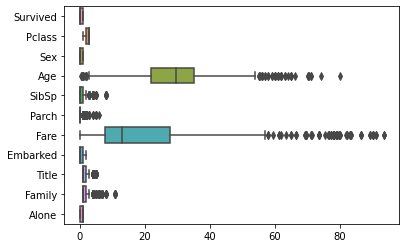

In [52]:
# Visualização após o tratamento dos Outliers.
# Deixarei alguns Outliers para obtermos um modelo mais generalista.
sns.boxplot(data = train.drop('PassengerId',axis=1), orient= 'h')

# Criando o Modelo

In [53]:
# Separando a classe dos Dados
X = train.drop(['Survived', 'PassengerId'], axis=1)
y = train['Survived']

In [54]:
# Criando um modelo Random Forest pra avaliar as melhores features
clf = RandomForestClassifier(n_estimators=100, random_state=123)
clf.fit(X, y)

RandomForestClassifier(random_state=123)

In [55]:
# Analisando a importância de cada feature
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Fare        0.247806
Age         0.235467
Title       0.172651
Sex         0.130978
Pclass      0.073912
Family      0.061088
Embarked    0.029120
SibSp       0.023864
Parch       0.015523
Alone       0.009592
dtype: float64

In [56]:
# Selecionando as features de maior importância.
features_selected = []
for feature,importance in feature_imp.iteritems():
    if importance > 0.03:
        print(f'{feature}: {round(importance * 100)}%')
        features_selected.append(feature)

Fare: 25%
Age: 24%
Title: 17%
Sex: 13%
Pclass: 7%
Family: 6%


In [57]:
# Treinando os modelos utilizando apenas as features selecionadas.
X = train[features_selected]
y = train['Survived']

In [58]:
# Criando pipeline com os algoritmos
pipelines = []
pipelines.append(('scaled-GNB', Pipeline([('scaler', StandardScaler()), ('GNB', GaussianNB())])))
pipelines.append(('scaled-LR', Pipeline([('scaler', StandardScaler()), ('LR', LogisticRegression())])))
pipelines.append(('scaled-DT', Pipeline([('scaler', StandardScaler()), ('DT', DecisionTreeClassifier())])))
pipelines.append(('scaled-RF', Pipeline([('scaler', StandardScaler()), ('RF', RandomForestClassifier())])))
pipelines.append(('scaled-XGB', Pipeline([('scaler', StandardScaler()), ('XGB', XGBClassifier())])))
pipelines.append(('scaled-SVC', Pipeline([('scaler', StandardScaler()), ('SVC', SVC())])))
resultados = []
nomes = []

for nome, modelo in pipelines:
    kfold = StratifiedKFold(shuffle=True, random_state=123)
    result = cross_val_score(modelo, X, y, cv=kfold, scoring='accuracy')
    resultados.append(result.mean())
    nomes.append(nome)
    print(f'{nome}: {result.mean()}')

scaled-GNB: 0.7887581978899345
scaled-LR: 0.80071998859424
scaled-DT: 0.7839962931280297
scaled-RF: 0.8174222982606217
[13:48:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:48:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:48:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_m

In [59]:
# Modelo final
X = StandardScaler().fit_transform(X)
svc = SVC().fit(X, y)
y_pred = cross_val_predict(svc, X, y, cv=5)

In [60]:
print(confusion_matrix(y, y_pred))

[[477  58]
 [ 89 214]]


In [61]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       535
           1       0.79      0.71      0.74       303

    accuracy                           0.82       838
   macro avg       0.81      0.80      0.81       838
weighted avg       0.82      0.82      0.82       838

